## Importação das Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## Carregando dataset

In [2]:
df = pd.read_csv('dogs_cats.csv', index_col=0)

In [3]:
df['classe'] = df['classe'].replace('cachorro', 0) 
df['classe'] = df['classe'].replace('gato', 1)
df

,comprimento,peso,classe
0,45.231415,431.548671,0
1,38.003753,517.870914,1
2,53.608592,444.025762,0
3,39.315731,524.066579,1
4,45.581301,450.552000,0
...,...,...,...
1995,37.590457,587.274926,1
1996,43.818870,416.846089,0
1997,36.876470,483.215531,1
1998,49.415613,514.637485,0


In [4]:
dataset = []

for index, row in df.iterrows():
    input  = row[['comprimento', 'peso']].values
    target = row['classe']
    dataset.append((input,int(target)))

[(array([ 45.23141496, 431.54867128]), 0),
 (array([ 38.00375264, 517.87091377]), 1),
 (array([ 53.60859154, 444.02576183]), 0),
 (array([ 39.31573084, 524.06657939]), 1),
 (array([ 45.58130119, 450.55200012]), 0),
 (array([ 41.00025802, 661.32747757]), 1),
 (array([ 51.50927463, 514.75633596]), 0),
 (array([ 45.33860726, 555.92848317]), 1),
 (array([ 46.99500972, 495.94158431]), 0),
 (array([ 38.49097995, 497.02280826]), 1),
 (array([ 47.11244722, 407.30508133]), 0),
 (array([ 46.73183651, 676.54956511]), 1),
 (array([ 63.12244519, 612.84355268]), 0),
 (array([ 39.86106541, 540.77380408]), 1),
 (array([ 52.68090739, 527.52892919]), 0),
 (array([ 44.95869067, 585.75230632]), 1),
 (array([ 42.87430988, 497.05195559]), 0),
 (array([ 38.51728013, 579.85850646]), 1),
 (array([ 48.31301601, 490.05906897]), 0),
 (array([ 32.68906511, 444.96557113]), 1),
 (array([ 51.97669664, 550.59063838]), 0),
 (array([ 39.82888414, 553.97576055]), 1),
 (array([ 40.77265297, 409.33255884]), 0),
 (array([ 3

## Visualização dos dados

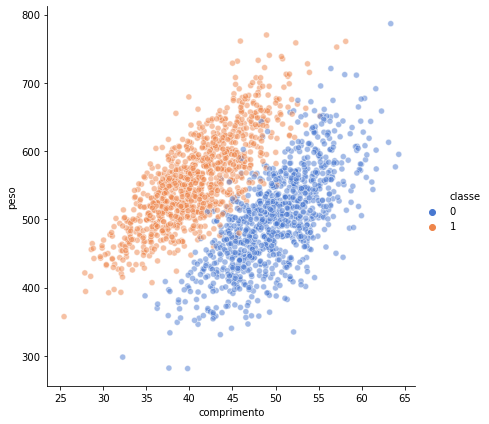

In [5]:
sns.relplot(x="comprimento", y="peso", hue="classe",
            alpha=.5, palette="muted",
            height=6, data=df)

## Sigmoid

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [7]:
def relu(x):
    return np.maximum(0,x)

## Perceptron

In [8]:
def perceptron(inputs, weights):
    
    # Definição do somatório dos produtos das entradas com os pesos 
    o = np.sum(inputs * weights)
    
    # Retorna o resultado do somatório aplicado à função sigmoid
    y = sigmoid(o)
    
    return y

In [9]:
# Função de atualização dos pesos do perceptron
def update_weights(inputs, weights, y, t, neta):
    return weights + neta * (t-y) * inputs * (y * (1-y))

## Avaliação

In [10]:
# Função avaliação
def evaluate(weights,dataset):
    # true positives, true negatives, false positives, false negatives
    tp, tn, fp, fn = 0, 0, 0, 0
    
    for example, target in dataset:

        # Adiciona o bias nas entradas
        example = np.append(example, 1)
        
        # Pega a predição do perceptron
        y = perceptron(example, weights)
        
        # Ativação em 0.5
        if(y < 0.5):
            y = 0
        else:
            y = 1
        
        # Se a predição é igual ao valor real
        if y == target:
            # Então testa se é tp ou tn
            if y == 1:
                tp += 1
            else:
                tn += 1
        # Senão testa se é fn ou fp
        else:
            if y == 0:
                fn += 1
            else:
                fp += 1

    # Acurácia
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    
    # Sensitividade
    recall = tp/(tp+fn)
    
    # Especificidade
    specificity = tn/(tn+fp)
    
    # Retorna as métricas
    return accuracy, recall, specificity

## Treino

In [11]:
# Inicialização
weights = (np.random.rand(1,2) - 0.5)[0]
bias = (np.random.rand(1) - 0.5) 
weights = np.append(weights, bias)

neta = 0.1

# Implemente o treino aqui (para separar as duas classes definidas)
accuracies = []

for epoch in range(200):
    np.random.shuffle(dataset)
    
    # Para cada exemplo do dataset
    for example, target in dataset:
        
        # Adiciona o bias nas entradas do exemplo
        example = np.append(example, 1)
        
        # Passa as entradas do exemplo e os pesos para o perceptron
        y = perceptron(example, weights)
        
        # Atualiza os pesos
        weights = update_weights(example, weights, y, target, neta)
    
    # Calcula as métricas de avaliação para a época
    accuracy, recall, specificity = evaluate(weights,dataset)
    # Exibe-as na tela
    print('Época:', epoch, 'Acurácia:', accuracy, 'Sensitividade', recall, 'Especificidade:', specificity)

Época: 0 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 1 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 2 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 3 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 4 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 5 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 6 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 7 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 8 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 9 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 10 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 11 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 12 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 13 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 14 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 15 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 16 Acurácia

Época: 134 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 135 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 136 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 137 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 138 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 139 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 140 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 141 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 142 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 143 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 144 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 145 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 146 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 147 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 148 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 149 Acurácia: 0.5 Sensitividade 0.0 Especificida

In [12]:
# Para cada exemplo do dataset
for example, target in dataset:
        
    # Adiciona o bias nas entradas do exemplo
    example = np.append(example, 1)
        
    # Passa as entradas do exemplo e os pesos para o perceptron
    y = perceptron(example, weights)
    
    print("true: " + str(target) + " predicted: " + str(y))

true: 1 predicted: 1.3977495125492896e-110
true: 1 predicted: 4.7699487789809153e-116
true: 0 predicted: 4.638279637574293e-96
true: 0 predicted: 1.0355341369913753e-95
true: 1 predicted: 5.9443357504550154e-114
true: 0 predicted: 3.17777017996872e-83
true: 0 predicted: 1.5373133476470696e-103
true: 1 predicted: 3.214432341437117e-119
true: 1 predicted: 1.0447271193247102e-117
true: 0 predicted: 2.7622264027357424e-87
true: 0 predicted: 8.517630933337994e-111
true: 0 predicted: 6.704000468413322e-116
true: 0 predicted: 3.227727377565733e-123
true: 1 predicted: 3.5924446059247736e-138
true: 0 predicted: 1.8398689826244158e-90
true: 1 predicted: 4.468293786358249e-113
true: 1 predicted: 1.0438321364197191e-134
true: 0 predicted: 3.538776286762107e-109
true: 0 predicted: 2.2886255648608877e-121
true: 0 predicted: 5.230137364599343e-114
true: 0 predicted: 1.5764531514033933e-141
true: 1 predicted: 2.7161167770402512e-120
true: 1 predicted: 2.2029722708229517e-118
true: 0 predicted: 4.26538

true: 0 predicted: 1.220460167604305e-94
true: 1 predicted: 1.2214295137580952e-140
true: 0 predicted: 1.1782138449397697e-75
true: 0 predicted: 1.8521378076095577e-95
true: 1 predicted: 3.5012418982222744e-120
true: 1 predicted: 5.37306970257121e-109
true: 1 predicted: 8.360934258751085e-113
true: 0 predicted: 7.396137641479504e-106
true: 0 predicted: 5.603710044786754e-97
true: 1 predicted: 6.922781405458086e-118
true: 0 predicted: 8.857653611492708e-88
true: 1 predicted: 2.4649549577242312e-101
true: 0 predicted: 8.417602815157501e-126
true: 0 predicted: 6.928776289138098e-103
true: 1 predicted: 2.1898369738114233e-127
true: 0 predicted: 2.4369023429843963e-102
true: 0 predicted: 3.2178518732830494e-89
true: 0 predicted: 1.3182484298847096e-107
true: 1 predicted: 4.633839459119968e-136
true: 1 predicted: 4.724129408764808e-112
true: 1 predicted: 9.988334065190678e-126
true: 0 predicted: 2.984979983068711e-101
true: 0 predicted: 6.492022503293171e-106
true: 1 predicted: 2.35783385536